In [ ]:
# Project 2 :

In [ ]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow

In [ ]:
# Load Dataset : MNIST Dataset

# Hndwritten Digits : 60000 Images
# Training : 50000 , Testing : 10000

In [ ]:
(x_train, y_train), (x_test, y_test)  = tensorflow.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
y_train[: 10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# Display Images

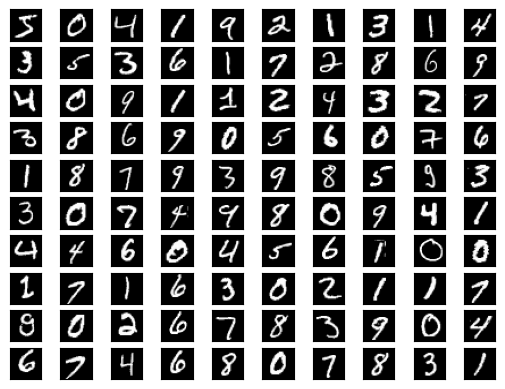

In [ ]:
#plt.figure(figsize=[15,15])
for i in range(100) :      # i = 0, 1, 2, 3,...  99
  plt.subplot(10, 10, i+1)
  plt.imshow(x_train[i, :, :], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])

plt.show()

In [ ]:
y_train[: 5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# Preprocessing

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
# Apply One Hot Encoding to Output/Labels

In [ ]:
Y_train = to_categorical(y_train)
Y_test  = to_categorical(y_test)

In [ ]:
image_size = 28 * 28
image_size

784

In [ ]:
# resize x_train, x_test dataset

X_train = np.reshape(x_train, [-1, 784])
X_test  = np.reshape(x_test, [-1,784])

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
# Normalize image values in the range of [0, 1] (apply scaling )

train_X = X_train / 255
test_X   = X_test / 255

In [ ]:
# Create a Model  :

In [ ]:
# Architecture Model : [Input Layer (784)]  = >   HL1 : 256   =>  HL2  : 128   => HL3 : 64  =>  [ Ouput =>  10 Nodes]

In [ ]:

Model = tensorflow.keras.Sequential()

# Hidden Layer - 1
Model.add(Dense(units= 256 , activation= 'relu' , input_shape = [784] ))
Model.add(Dropout(0.20))

# Hidden Layer - 2
Model.add(Dense(units= 128 , activation= 'relu'))
Model.add(Dropout(0.20))

# Hidden Layer - 3
Model.add(Dense(units= 128, activation='relu'))
Model.add(Dropout(0.20))

# Output Layer
Model.add(Dense(units= 10, activation= 'softmax'))    # Multi class classification : softmax    |      Binary Classification : sigmoid

In [ ]:
# Summary of Model

Model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Visualizing Model

plot_model(Model, show_shapes= True )

In [ ]:
# Compile Model

Model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
            )

In [ ]:
# Train the Model with training Data

In [ ]:
history = Model.fit(train_X , Y_train, epochs =  5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8461 - loss: 0.4971
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9572 - loss: 0.1455
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9680 - loss: 0.1085
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9742 - loss: 0.0869
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9762 - loss: 0.0794


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame(history.history)

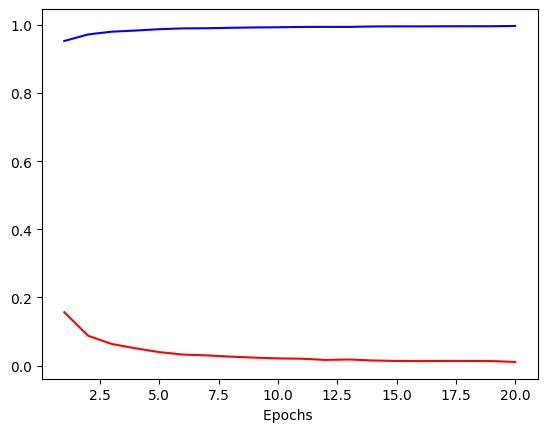

In [ ]:
plt.plot( range(1, 21),  df1['accuracy'], color = 'blue')
plt.plot( range(1, 21),  df1['loss'], color = 'red')
plt.xlabel('Epochs ')

plt.show()

In [ ]:
# Predict Outcomes

pred_train = Model.predict(train_X).round()
pred_test  = Model.predict(test_X).round()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
np.argmax(Y_train[0])

np.int64(5)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Testing Accuracy : ", accuracy_score(Y_test, pred_test) )

Testing Accuracy :  0.9756


In [ ]:
print("Training Accuracy : ", accuracy_score(Y_train, pred_train) )

Training Accuracy :  0.9888666666666667
